In [1]:
from matplotlib import pyplot as plt
from museek.util.context_loader import ContextLoader
from museek.enums.result_enum import ResultEnum
import numpy as np
import os

In [2]:
# Load pickle with data object.  
# Note that there are different levels of flags - check the flagger plugins in the museek config file (process_uhf_band)

#context_loader = ContextLoader('/idia/projects/hi_im/uhf_2023/pipeline_results/1677011008/newrun_2/flux10/1677011008/aoflagger_plugin_postcalibration.pickle')
#context_loader = ContextLoader('/idia/projects/hi_im/uhf_2023/pipeline_results/1680644082/aoflagger_plugin_secondrun.pickle')
context_loader = ContextLoader('/idia/projects/hi_im/uhf_2023/pipeline_results/1680644082/aoflagger_plugin.pickle')


In [3]:
# select scan data
scan_data = context_loader.get_result(location=ResultEnum.SCAN_DATA)

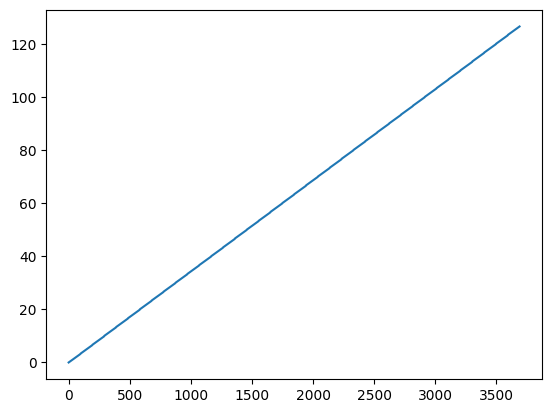

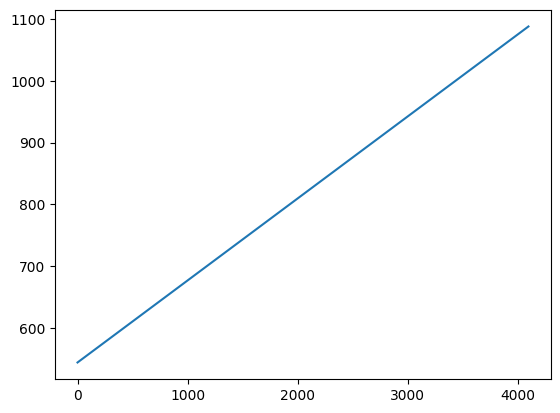

In [4]:
times = scan_data.timestamps.array.squeeze()
times = (times-times[0])/60   # convert to minutes satrting at zero
freqs = scan_data.frequencies.squeeze/10**6   # convert to MHz
plt.plot(times)
plt.show()
plt.plot(freqs)

In [5]:
# get array of flags: 1st index=flag level; 2nd=time; 3rd=freq; 4th=receiver
# Note that flag level is not imposed to imply more complexity although it usually is, e.g. flag=0 is the SARAO flags, flag=1 the first aoflagger results, flag=2 will be more agressive, etc.
# Flag order follows the plugin order in the config file  
# Flag values are Boolean (binary). 0 (False) means unflagged; 1 (True) means flagged (numpy MaskedArray convention)
flags=scan_data.flags.array
print(flags.shape)

(5, 3691, 4096, 118)


In [6]:
# Produce one single set of flags by combining all of them
# values below the threshold are set to False (not flagged) 
# "combine" method will first add the flags, so we could use a threshold higher than 1 for some reason
combined_flags = scan_data.flags.combine(threshold=1)

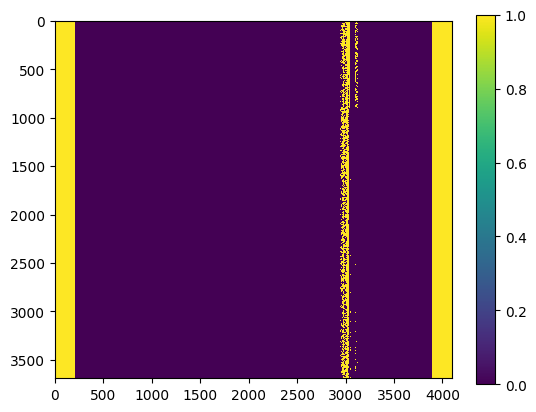

In [7]:
plt.imshow(flags[0,:,:,0], interpolation='none')
plt.colorbar()

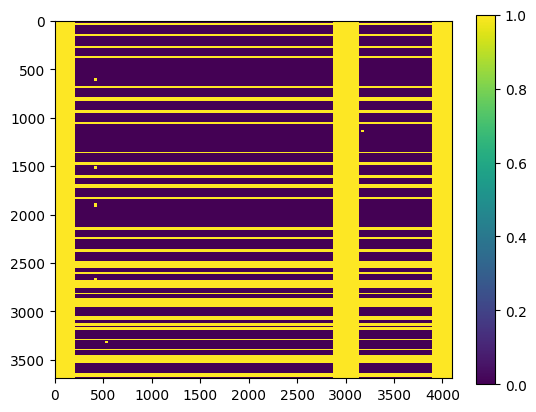

In [8]:
plt.imshow(combined_flags.array[:,:,0], interpolation='none')
plt.colorbar()